In [1]:
%matplotlib inline
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

In [81]:
img = cv.imread('TP4/Imagen3.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [69]:
def sumatoria(matrix_3_3):
    # print(matrix_3_3)
    i_c=matrix_3_3[1][1]
    i_n_list=[matrix_3_3[0][0],
              matrix_3_3[0][1],
              matrix_3_3[0][2],
              matrix_3_3[1][0],
              matrix_3_3[1][2],
              matrix_3_3[2][0],
              matrix_3_3[2][1],
              matrix_3_3[2][2]]
    value_pixel=0
    for index,value in enumerate(i_n_list):
        if i_c >= value:
            value_pixel+=(1*(2**index))
    return value_pixel

print(sumatoria(np.array([[1,1,1],[1,0,1],[1,1,1]])))
print(sumatoria([[0,0,0],[0,1,0],[0,0,0]]))


0
255


In [76]:
# print(gray.shape)
# print(gray.shape[0])
# print(np.arange(1,gray.shape[0]))
# print(np.array([[0,0,0,0],[0,0,0,0],[0,1,0,0],[0,0,0,0]])[0:3,0:3])
def lbp(img):
    imagen_filtrada=[]
    rows=img.shape[0]
    columns=img.shape[1]
    for row in np.arange(1,rows-1):
        pattern=[]
        for col in np.arange(1,columns-1):
            # print(columns)
            f=img[row-1:row+2,col-1:col+2]
            pattern.append(sumatoria(f))
        imagen_filtrada.append(pattern)
    return np.array(imagen_filtrada)

print(lbp(np.array([[0,1,2,3],[4,5,6,7],[8,9,10,11],[12,13,14,15]])))

[[15 15]
 [15 15]]


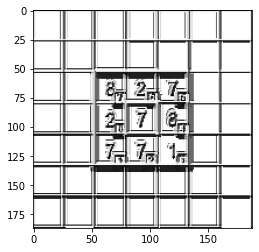

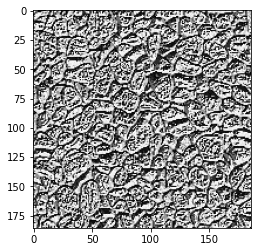

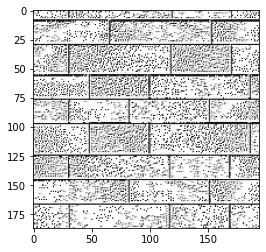

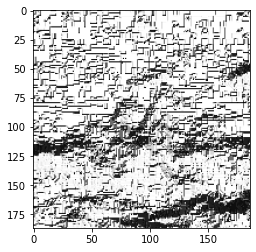

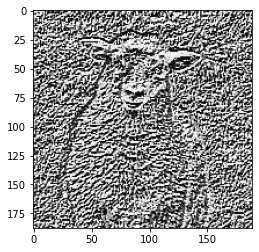

In [93]:
for i in np.arange(1,6):
    img = cv.imread('TP4/Imagen'+str(i)+'.png')
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gray_filtrado=lbp(gray)
    plt.imshow(gray_filtrado, cmap='gray', vmin=0, vmax=255)
    plt.show()

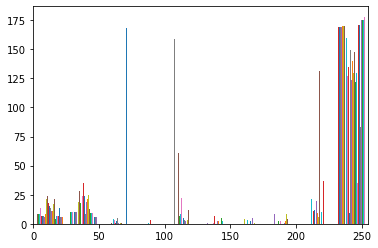

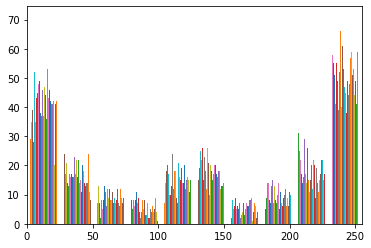

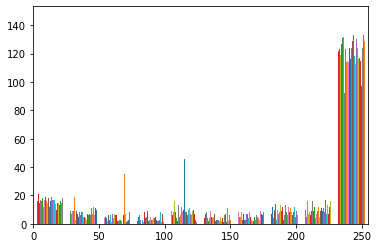

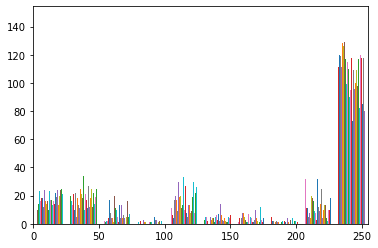

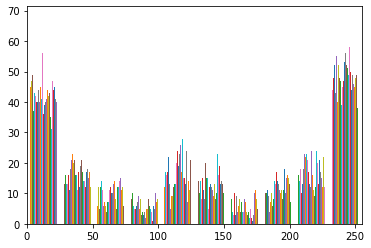

In [92]:
for i in np.arange(1,6):
    img = cv.imread('TP4/Imagen'+str(i)+'.png')
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gray_filtrado=lbp(gray)
    plt.hist(gray_filtrado)
    plt.xlim(0,255)
    plt.show()

In [142]:
# img = cv.imread('TP4/Imagen'+"2"+'.png')
# gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# gray_filtrado=lbp(gray)
# hist, _ = np.histogram(gray_filtrado, bins=256)
# print(hist)

hist_list=[]
for i in np.arange(1,6):
    img = cv.imread('TP4/Imagen'+str(i)+'.png')
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    gray_filtrado=lbp(gray)
    hist, _ = np.histogram(gray_filtrado, bins=256)
    hist_list.append(hist)

print(len(hist_list), hist_list)

5 [array([  121,     2,    78,    16,     4,     0,    11,    27,    74,
           8,     3,    42,     1,     0,     1,    95,    80,     3,
           2,     1,    19,     0,    62,   227,  1158,     6,     1,
           5,     6,     2,     1,  1910,     9,     1,    13,     3,
           2,     0,     1,     2,    14,    26,     8,   123,     1,
           0,     2,    54,     2,     0,     0,     0,     0,     1,
           0,     1,     8,     8,     0,     0,     0,     0,     1,
          54,    58,     8,  1037,     7,     7,     0,     5,    12,
           2,     9,     1,     1,     0,     0,     0,     2,     5,
           0,     0,     0,    16,     1,     1,     3,     0,     0,
           0,     0,     0,     0,     0,     1,     7,     1,     6,
           0,     0,     0,     0,     2,    34,    75,     5,  1890,
           1,     0,     1,    66,     1,     0,     0,     1,     2,
           0,     0,     2,     2,     3,     0,     6,     1,     4,
           1,    

In [157]:
def compare_hist(index_objective, histograms):
    objective=hist_list[index_objective]
    histograms=histograms.copy()
    # histograms.pop(index_objective)
    intersections=[]
    for i in histograms:
        minima = np.minimum(objective, i)
        intersection = np.true_divide(np.sum(minima), np.sum(objective))
        intersections.append(intersection)
    return intersections

In [158]:
print(compare_hist(0,hist_list))
print(compare_hist(1,hist_list))
print(compare_hist(2,hist_list))
print(compare_hist(3,hist_list))
print(compare_hist(4,hist_list))

[1.0, 0.20750369780407327, 0.6507850722494026, 0.6465468198884969, 0.2074752531573558]
[0.21086252745982195, 1.0, 0.43886576482830386, 0.4485200601225575, 0.8731067175396]
[0.6306576988808644, 0.4185181101494018, 1.0, 0.6201279012073433, 0.4327967363140195]
[0.653498936231384, 0.4461215571272497, 0.6468000690012076, 1.0, 0.45566672416767295]
[0.2052797478329393, 0.8501069458516267, 0.44188337273443656, 0.446048632218845, 1.0]
